In [2]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
from math import exp, pi
import matplotlib.pyplot as plt

In [3]:
# Read data from file
sample = pd.read_csv(r'C:\Users\Anton\Documents\Python Scripts\PNN\sample.csv', sep=',',header=0)
cleaned_data = np.array([ sample['Length'],sample['Width']]).T
classes = np.array(pd.unique(sample['Class']))
    
print("sample = \n", sample)
print("cleaned data = \n", cleaned_data)
print("classes = \n", classes)

sample = 
   Class  Length  Width
0     b     0.5    0.7
1     b     0.2    0.5
2     r     0.8    0.8
3     r     0.4    0.5
4     g     0.8    0.5
5     g     0.6    0.3
6     g     0.3    0.2
cleaned data = 
 [[ 0.5  0.7]
 [ 0.2  0.5]
 [ 0.8  0.8]
 [ 0.4  0.5]
 [ 0.8  0.5]
 [ 0.6  0.3]
 [ 0.3  0.2]]
classes = 
 ['b' 'r' 'g']


In [9]:
# Count classes
groups = sample.groupby('Class')
number_of_classes = len(groups)
dictionary_of_sum = {}
increament_current_row_in_matrix = 0

print("number_of_classes = ", number_of_classes)

number_of_classes =  3


In [10]:
# Test data
input_units = [.6, .6]
sigma = 0.5

In [11]:
# Main loop
for cl in range(0, number_of_classes):
    
    class_name = classes[cl]
    dictionary_of_sum[class_name] = 0
    number_of_data_point_from_class_k = len(groups.get_group(class_name))
    
    temp_summation = 0.0
    
    for i in range(0, number_of_data_point_from_class_k):
        
        tempx = (input_units[0] - cleaned_data[increament_current_row_in_matrix][0])
        tempy = (input_units[1] - cleaned_data[increament_current_row_in_matrix][1])
        temp_sum = exp( -1 * (tempx**2 + tempy**2) / ( 2*(sigma**2) ) )
    
        temp_summation += temp_sum
    
        increament_current_row_in_matrix += 1
    
    dictionary_of_sum[class_name]  = temp_summation / (number_of_data_point_from_class_k)
    
classified_class = str( max(dictionary_of_sum, key=dictionary_of_sum.get) )

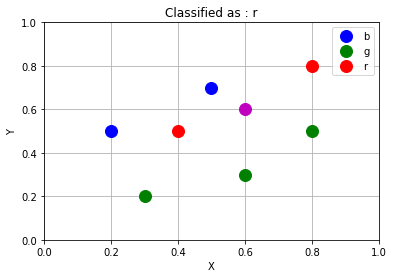

In [12]:
# Drawing the graph
fig, ax = plt.subplots()
colour = ["b","g","r"]
i = 0
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Length'], group['Width'],color=colour[i],marker='o', linestyle='', ms=12, label=name)
    i += 1

# Draw the unclassified data point 
ax.plot(input_units[0], input_units[1], c='m', marker='o', linestyle='', ms=12)

# Setting the limit of x and y axis
#ax.set_prop_cycle(colour)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.legend()
plt.title('Classified as : ' + str(classified_class) )
plt.xlabel('X')
plt.ylabel('Y')

# Giving a grid and show the plot
plt.grid()
plt.show()

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])

sigma = np.array([.5, .5])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(cleaned_data, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
print(z)
#z = z.reshape(x.shape)
#print(z)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x,y,z)
ax.plot_wireframe(x,y,z)

#plt.show()

[ 0.14491865  0.35644237  0.04921373  0.2803875   0.10735838  0.25883028
  0.49086669]


<IPython.core.display.Javascript object>

ValueError: Argument Z must be 2-dimensional.